In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
!pip install apyori

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5955 sha256=830d6f67aaa1ae87377c5cd4e8e2cd3aac7506434d7f859b6991921715c868f9
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\32\2a\54\10c595515f385f3726642b10c60bf788029e8f3a1323e3913a
Successfully built apyori


In [3]:
df = pd.read_csv("Groceries_dataset.csv")
df.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Member_number    38765 non-null  int64 
 1   Date             38765 non-null  object
 2   itemDescription  38765 non-null  object
dtypes: int64(1), object(2)
memory usage: 908.7+ KB


In [6]:
df.isnull().sum()

Member_number      0
Date               0
itemDescription    0
dtype: int64

In [10]:
df['date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  object        
 2   itemDescription  38765 non-null  object        
 3   date             38765 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.2+ MB


C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '21-07-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '19-09-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '14-02-2015' in DD/MM/YYYY format. Provide format or specify infer_datetime_format=True for consistent parsing.
  cache_array = _maybe_cache(arg, format, cache, convert_listlike)
C:\Users\hp\anaconda3\lib\site-packages\pandas\core\tools\datetimes.py:1047: UserWarning: Parsing '23-12-2015' in DD/MM/YYYY format. Provide format or specify infer_date

In [11]:
df.head()

,Member_number,Date,itemDescription,date
0,1808,21-07-2015,tropical fruit,2015-07-21
1,2552,05-01-2015,whole milk,2015-05-01
2,2300,19-09-2015,pip fruit,2015-09-19
3,1187,12-12-2015,other vegetables,2015-12-12
4,3037,01-02-2015,whole milk,2015-01-02


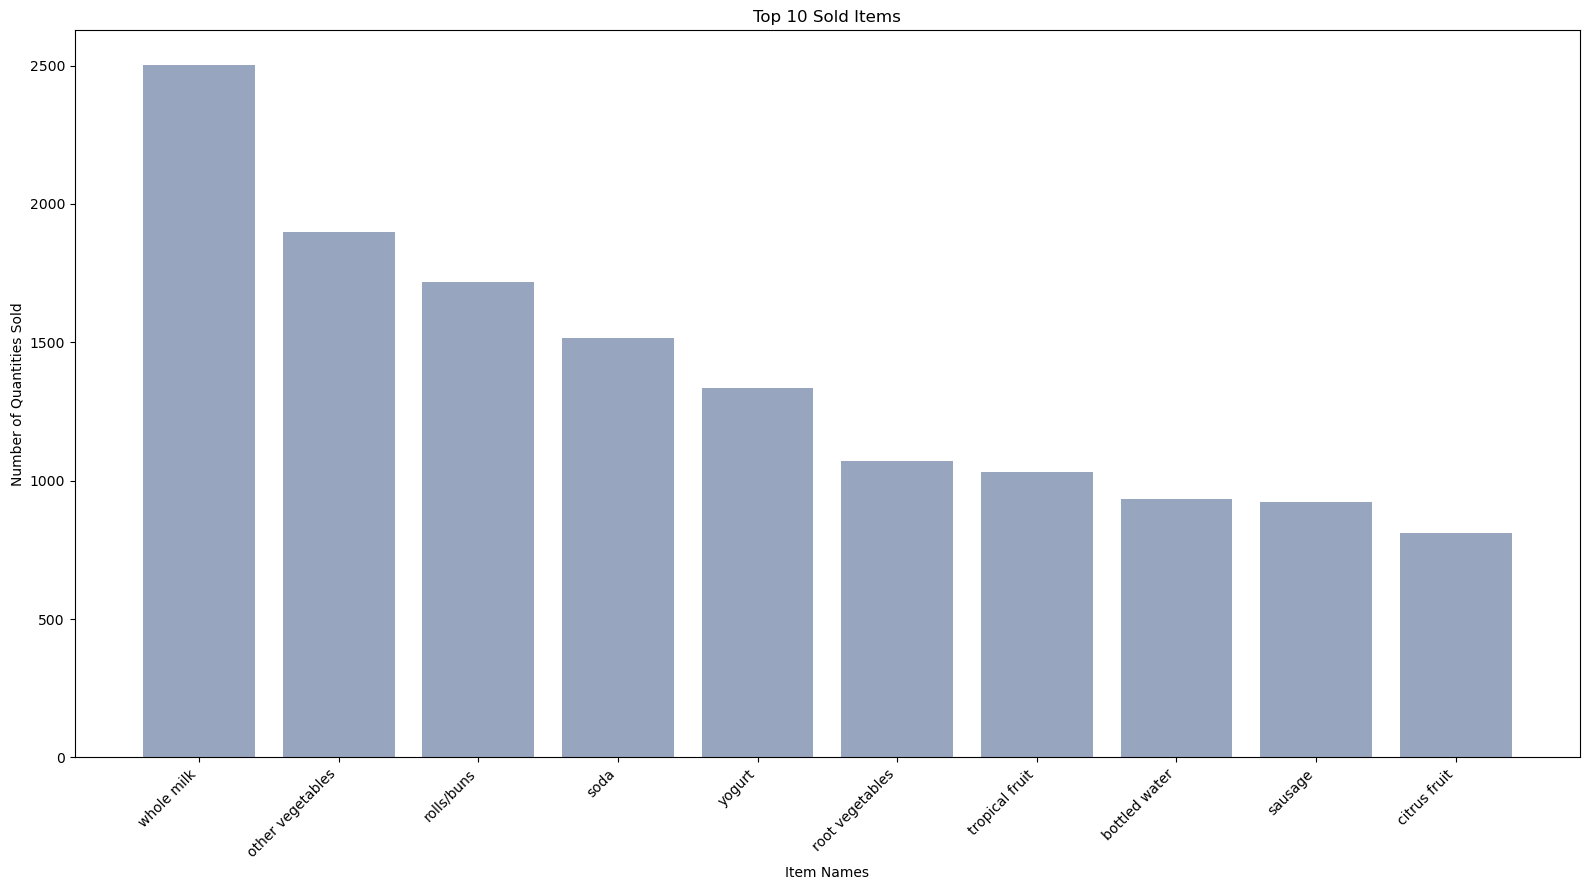

In [15]:
Item_distr = df.groupby(by='itemDescription').size().reset_index(name='Frequency').sort_values(by='Frequency', ascending=False).head(10)

bars = Item_distr["itemDescription"]
height = Item_distr["Frequency"]
x_pos = np.arange(len(bars))

plt.figure(figsize=(16, 9))

# Change plt.bars to plt.bar
plt.bar(x_pos, height, color=(0.2, 0.3, 0.5, 0.5))

plt.title("Top 10 Sold Items")
plt.xlabel("Item Names")
plt.ylabel("Number of Quantities Sold")

plt.xticks(x_pos, bars, rotation=45, ha='right')  # Rotate x-ticks for better visibility
plt.tight_layout()  # Adjust layout to fit labels
plt.show()

In [16]:
df_date = df.set_index(['Date'])
df_date

,Member_number,itemDescription,date
Date,,,
21-07-2015,1808,tropical fruit,2015-07-21
05-01-2015,2552,whole milk,2015-05-01
19-09-2015,2300,pip fruit,2015-09-19
12-12-2015,1187,other vegetables,2015-12-12
01-02-2015,3037,whole milk,2015-01-02
...,...,...,...
08-10-2014,4471,sliced cheese,2014-08-10
23-02-2014,2022,candy,2014-02-23
16-04-2014,1097,cake bar,2014-04-16


Index(['Member_number', 'itemDescription', 'date'], dtype='object')


[Text(0.5, 0, 'Date'), Text(0, 0.5, 'Number of Items Sold')]

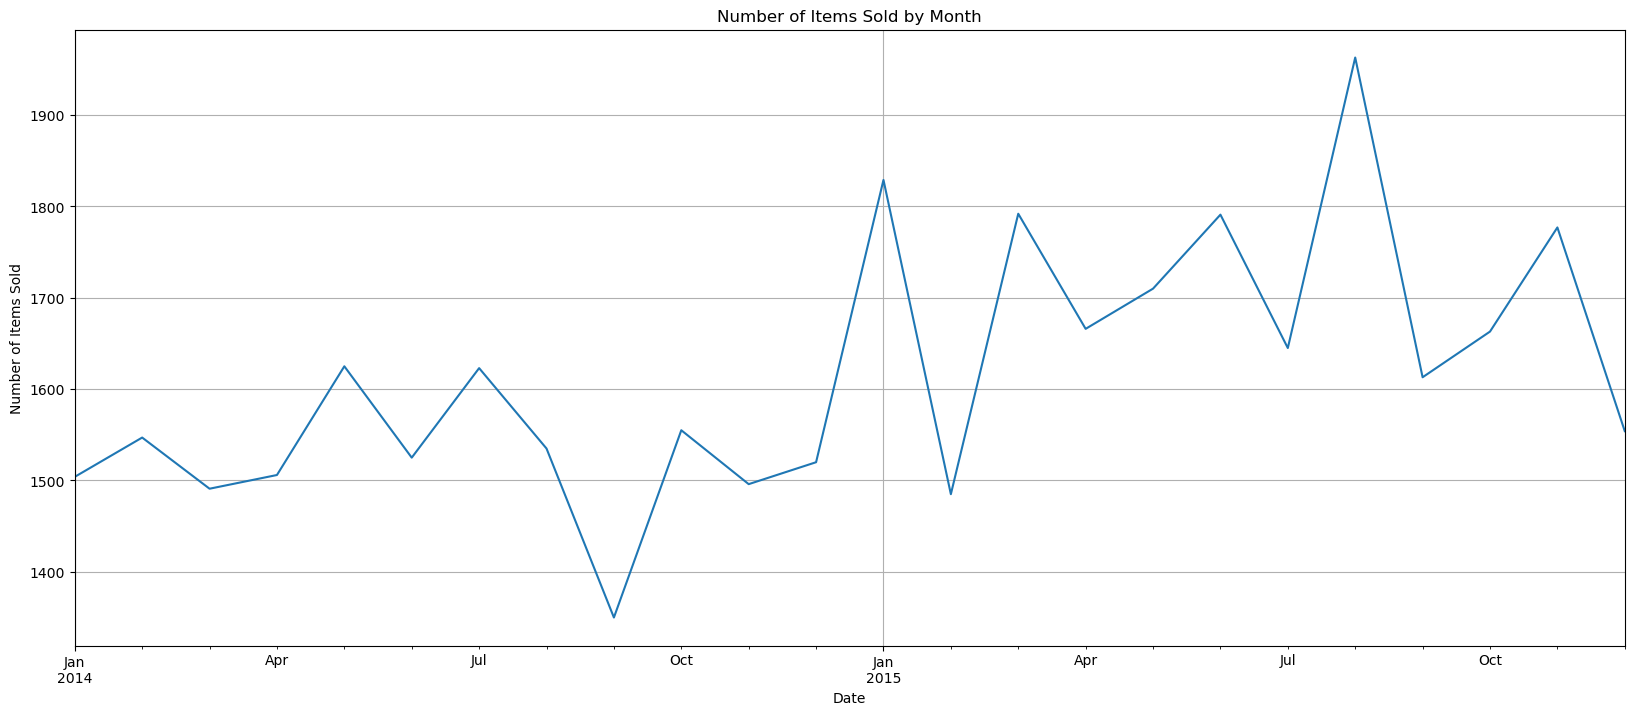

In [19]:
# Check the columns in your DataFrame
print(df_date.columns)

# Assuming the actual date column name is 'date' (replace with your actual column name)
df_date['date'] = pd.to_datetime(df_date['date'])  # Convert to datetime
df_date.set_index('date', inplace=True)  # Set as index

# Now you can resample and plot
df_date.resample("M")["itemDescription"].count().plot(figsize=(20, 8), grid=True, title='Number of Items Sold by Month').set(xlabel="Date", ylabel="Number of Items Sold")

In [21]:
cust_level = df[["Member_number", "itemDescription"]].sort_values(by="Member_number", ascending=False)
cust_level["itemDescription"] = cust_level["itemDescription"].str.strip()
cust_level

,Member_number,itemDescription
3578,5000,soda
34885,5000,semi-finished bread
11728,5000,fruit/vegetable juice
9340,5000,bottled beer
19727,5000,root vegetables
...,...,...
13331,1000,whole milk
17778,1000,pickled vegetables
6388,1000,sausage
20992,1000,semi-finished bread


In [22]:
transactions = [a[1]['itemDescription'].tolist() for a in list(cust_level.groupby(["Member_number"]))]

In [27]:
from apyori import apriori
rules = apriori(transactions = transactions, min_support = 0.002,min_confidence = 0.05, min_lift =3, min_length = 2)

In [29]:
results = list(rules)
results

[]

In [31]:
def inspect(results):
    lhs = [tuple(result[2][0][0])[0] for result in results]
    rhs = [tuple(result[2][0][1])[0] for result in results]
    supports = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))

resultsindataframe = pd.DataFrame(inspect(results), columns=['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [34]:
# Convert the 'Lift' column to numeric
resultsindataframe['Lift'] = pd.to_numeric(resultsindataframe['Lift'], errors='coerce')

# Now find the largest values
top_lifts = resultsindataframe.nlargest(n=10, columns='Lift')
print(top_lifts)

Empty DataFrame
Columns: [Left Hand Side, Right Hand Side, Support, Confidence, Lift]
Index: []
